In [114]:
#Dataset used for the analysis can be found below
#https://www.kaggle.com/competitions/data-science-nigeria-patient-treatment/data

#We begin with the usual importing of all the required libraries for EDA and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
cd downloads

C:\Users\hp\downloads


In [118]:
#Importing Data for the Analysis 
patient_treatment=pd.read_csv("train.csv")
testing=pd.read_csv("test.csv")

In [143]:
samplesubmission=pd.read_csv("sample_submission.csv")

In [120]:
patient_treatment.head(5)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


In [121]:
testing.head(5)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F
4,patient_id_789,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,F


In [122]:
##checking Data Shape
patient_treatment_test.shape

(1324, 10)

In [123]:
## dropping the ID variable from both train and test data
patient_treatment.drop(["patient_id_"], axis="columns", inplace=True )
testing.drop(["patient_id_"], axis="columns", inplace=True )

In [85]:
print(patient_treatment)
print(patient_treatment_test)

      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            43.6          14.5         5.52        3.0          237  27.5   
1            44.3          14.4         5.09        7.3          255  29.7   
2            36.2          12.5         4.57        7.8          263  28.9   
3            46.1          14.7         5.38        8.5          320  28.6   
4            31.8          10.9         4.05       26.9          220  28.6   
...           ...           ...          ...        ...          ...   ...   
3083         40.5          13.8         4.54       10.9          290  32.1   
3084         28.8          10.5         3.49       20.6          735  32.3   
3085         45.9          15.4         5.64        3.9          281  28.5   
3086         32.6          10.2         5.36        4.4          303  20.0   
3087         41.5          14.0         5.23        4.3          176  28.1   

      MCHC   MCV  AGE  SEX  SOURCE  
0     33.6  81.7   32    0

In [127]:
##Coverting SEX variable to numerical from string 
patient_treatment["SEX"]=patient_treatment["SEX"].apply(lambda x: 1 if x=="M" else 0)
testing["SEX"]=testing["SEX"].apply(lambda x: 1 if x=="M" else 0)

In [128]:
patient_treatment
testing

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,0
1,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,0
2,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,0
3,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,0
4,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,0
...,...,...,...,...,...,...,...,...,...,...
1319,40.5,12.7,4.89,9.5,436,27.4,31.8,86.1,45,0
1320,38.2,13.1,4.71,13.8,180,29.3,34.7,84.4,41,0
1321,35.2,11.9,4.74,7.4,303,26.5,34.3,77.3,39,0
1322,36.9,12.0,4.42,11.4,306,28.7,33.0,87.2,70,0


In [129]:
##Descriptive Statistics of all variables for train dataset

patient_treatment.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.0,3088.000000
mean,38.381865,12.638472,4.752160,8.788504,260.652850,28.218264,33.352364,84.540026,46.617876,0.0,0.409974
std,6.070420,2.104983,0.792281,5.055580,115.504157,2.658656,1.227691,6.814936,21.684646,0.0,0.491908
min,13.900000,4.300000,1.690000,1.200000,13.000000,14.900000,26.400000,54.000000,1.000000,0.0,0.000000
25%,34.500000,11.275000,4.240000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.0,0.000000
50%,38.800000,12.800000,4.790000,7.600000,259.000000,28.700000,33.400000,85.400000,47.000000,0.0,0.000000
75%,42.700000,14.200000,5.260000,10.400000,325.000000,29.800000,34.100000,88.700000,64.000000,0.0,1.000000
max,69.200000,18.100000,8.070000,76.700000,1188.000000,36.800000,39.000000,105.300000,99.000000,0.0,1.000000


In [130]:
##Descriptive Statistics of all variables for test dataset
testing.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.0
mean,38.434592,12.649320,4.749162,8.888822,266.889728,28.273036,33.321299,84.783006,46.646526,0.0
std,5.747626,2.020961,0.764941,5.034963,110.236480,2.705596,1.231122,6.960646,21.847658,0.0
min,14.800000,3.700000,2.190000,1.200000,15.000000,16.500000,26.000000,54.100000,1.000000,0.0
25%,34.800000,11.400000,4.290000,5.900000,200.000000,27.100000,32.600000,81.600000,29.000000,0.0
50%,38.850000,12.800000,4.770000,7.700000,267.000000,28.700000,33.400000,85.400000,48.000000,0.0
75%,42.700000,14.025000,5.270000,10.600000,327.000000,29.900000,34.100000,88.800000,64.000000,0.0
max,58.300000,18.800000,7.170000,60.900000,979.000000,40.800000,37.600000,115.600000,98.000000,0.0


In [21]:
##This is used to check missing values from the train data

patient_treatment.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

from the result of the analysis above, it was revealed that there are no missing value from any of the variables which is a god thing for our analysis.

In [23]:
patient_treatment.SOURCE.value_counts()

0    1822
1    1266
Name: SOURCE, dtype: int64

In [35]:
patient_treatment.groupby('SOURCE').mean()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
SOURCE,,,,,,,,,,
0,39.794182,13.099890,4.909341,8.190505,284.592206,28.254281,33.331339,84.698189,44.768935,0.504391
1,36.349289,11.974408,4.525948,9.649131,226.199842,28.166430,33.382622,84.312401,49.278831,0.551343


In [36]:
patient_treatment.groupby('SOURCE').sum()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
SOURCE,,,,,,,,,,
0,72505.0,23868.0,8944.82,14923.1,518527,51479.3,60729.7,154320.1,81569,919
1,46018.2,15159.6,5729.85,12215.8,286369,35658.7,42262.4,106739.5,62387,698


In [37]:
##correlation Analysis
patient_treatment.corr()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
HAEMATOCRIT,1.000000,0.972772,0.866608,-0.208369,0.002191,0.089529,0.101732,0.064190,-0.250285,0.281060,-0.279152
HAEMOGLOBINS,0.972772,1.000000,0.821802,-0.199832,-0.041193,0.207500,0.303983,0.114303,-0.235737,0.316085,-0.263011
ERYTHROCYTE,0.866608,0.821802,1.000000,-0.178692,0.031231,-0.373516,-0.054127,-0.422396,-0.405648,0.249041,-0.238040
LEUCOCYTE,-0.208369,-0.199832,-0.178692,1.000000,0.281519,-0.016121,0.008830,-0.019837,0.195593,0.059672,0.141924
THROMBOCYTE,0.002191,-0.041193,0.031231,0.281519,1.000000,-0.142514,-0.208384,-0.076579,0.031990,-0.068882,-0.248681
MCH,0.089529,0.207500,-0.373516,-0.016121,-0.142514,1.000000,0.592368,0.931377,0.346764,0.087998,-0.016254
MCHC,0.101732,0.303983,-0.054127,0.008830,-0.208384,0.592368,1.000000,0.261626,0.045412,0.212309,0.020548
MCV,0.064190,0.114303,-0.422396,-0.019837,-0.076579,0.931377,0.261626,1.000000,0.390368,0.008267,-0.027846
AGE,-0.250285,-0.235737,-0.405648,0.195593,0.031990,0.346764,0.045412,0.390368,1.000000,0.041536,0.102305
SEX,0.281060,0.316085,0.249041,0.059672,-0.068882,0.087998,0.212309,0.008267,0.041536,1.000000,0.046236


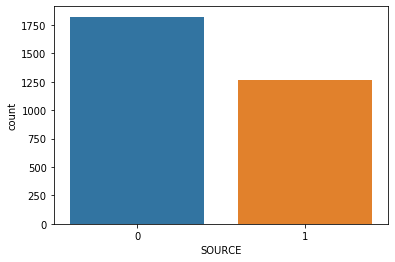

In [38]:
sns.countplot(x="SOURCE", data=patient_treatment)

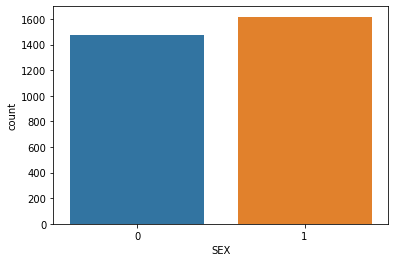

In [39]:
sns.countplot(x="SEX", data=patient_treatment)

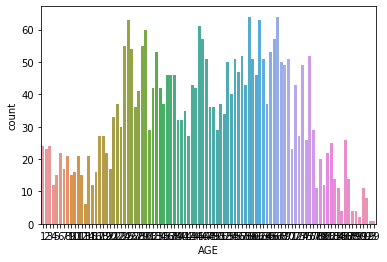

In [40]:
sns.countplot(x="AGE", data=patient_treatment)

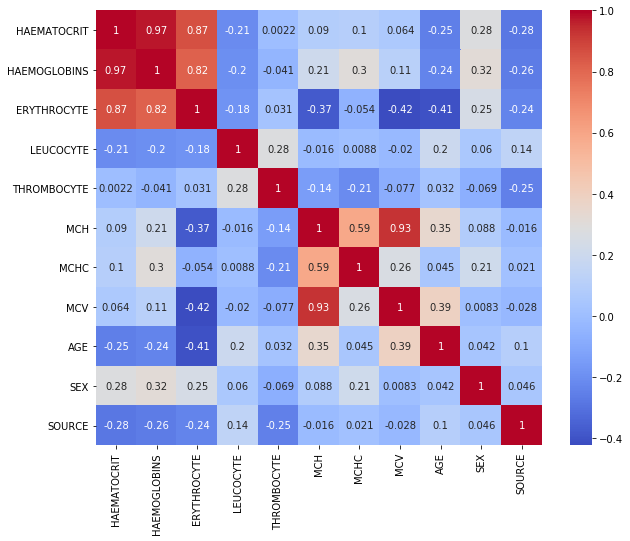

In [41]:
#lets first look more into the relationship between the features
#using the correlation heatmap


plt.figure(figsize=(10,8))
sns.heatmap(patient_treatment.corr(), cmap='coolwarm',annot=True); 

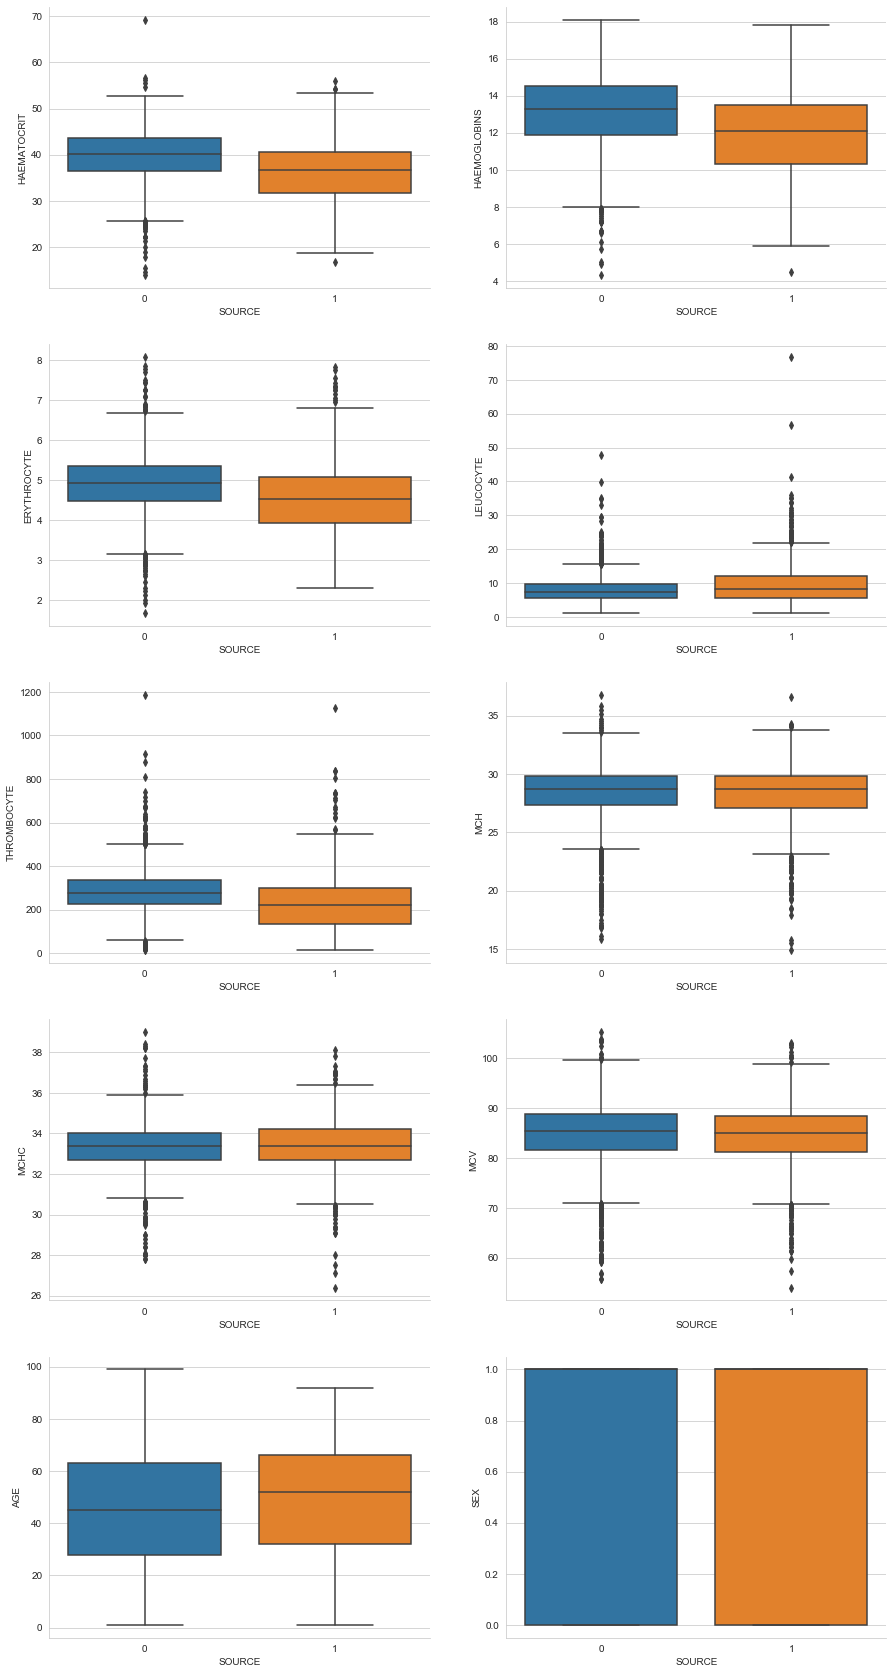

In [45]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    # axes is 2d array (5x2)
axes = axes.flatten()         # Convert axes to 1d array of length 10
fig.set_size_inches(15, 30)

for i, column in enumerate(patient_treatment.loc[:, patient_treatment.columns != 'SOURCE'], 1):
    plt.subplot(5,2,i)
    sns.set_style("whitegrid")
    sns.boxplot(x = patient_treatment['SOURCE'], y = patient_treatment[column])
    sns.despine()

In [132]:
##Importing Neccesary model for the analysis
from sklearn import metrics
from sklearn.model_selection import train_test_split

## splitting data to train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=22)

In [133]:
#data preprocessing and split of data to depedent and independent variable#

x=patient_treatment.drop(["SOURCE"], axis="columns")
y=patient_treatment["SOURCE"]

In [134]:
## Importing logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression
logisticmodel=LogisticRegression()

##fitting data
logisticmodel.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
##Confusion matrix function definition 
def ConfusionMatrix(ytest, logistic_prediction, label=["non positive", "positive"]):
    from sklearn.metrics import confusion_matrix
    #Confusion matrix to check performance
    CM=confusion_matrix(ytest,logistic_prediction)
    plt.figure(figsize=(7,5))
    sns.heatmap(CM, annot=True, cbar=False, fmt='d', cmap='YlGn')
    plt.xlabel("predicted", fontsize=33)
    plt.ylabel ("True", fontsize=23)
    plt.title('A confusion matrix', fontsize=25);

In [135]:
##Predicting the test variable with the fit model
logistic_prediction=logisticmodel.predict(x_test)

In [142]:
logistic_prediction

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

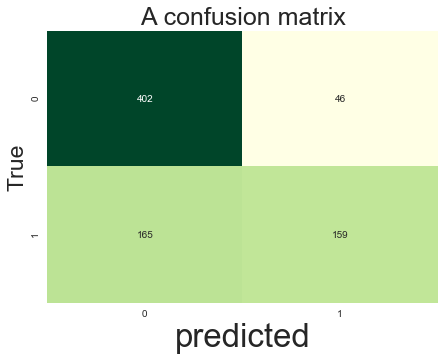

In [141]:
ConfusionMatrix(y_test, logistic_prediction, label=["non positive", "positive"])

In [137]:
logistic_prediction.shape

(772,)

In [139]:
accuracy=metrics.accuracy_score(y_test, logistic_prediction)
F1=metrics.f1_score(y_test, logistic_prediction)

print("Logistic model Accuracy value is ", accuracy)
print("Logistic Forest model F1 value is ", F1)

Logistic model Accuracy value is  0.7266839378238342
Logistic Forest model F1 value is  0.6011342155009453


In [146]:
samplesubmission.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [147]:
first_submission=samplesubmission.copy()

In [148]:
first_submission

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1
...,...,...
1319,patient_id_2070,1
1320,patient_id_1789,1
1321,patient_id_1725,1
1322,patient_id_3707,1


In [154]:
first_submission.SOURCE = logisticmodel.predict(testing)

In [158]:
first_submission.head()

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,1


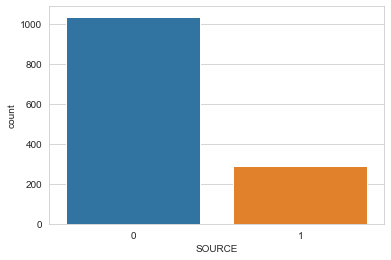

In [159]:
sns.countplot(first_submission.SOURCE)

In [162]:
first_submission.to_csv('my-first_sub', index=False)

# Random Forest CLassifier MODEL

In [186]:
## Importing Random Forest regression model from sklearn

from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier()
RFmodel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
RF_predict=RFmodel.predict(x_test)
accuracy=metrics.accuracy_score(y_test, RF_predict)

F1=metrics.f1_score(y_test, RF_predict)

print("Random Forest model Accuracy value is ", accuracy)
print("Random Forest model F1 value is ", F1)

Random Forest model Accuracy value is  0.75
Random Forest model F1 value is  0.6608084358523726


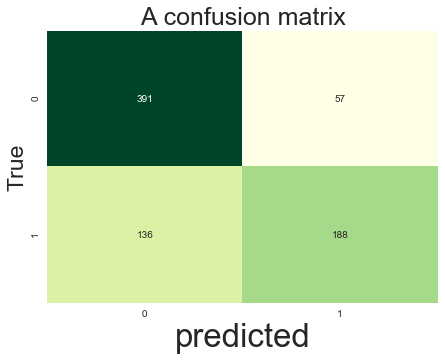

In [189]:
ConfusionMatrix(y_test, RF_predict, label=["non positive", "positive"])

In [168]:
second_submission=samplesubmission.copy()
second_submission.SOURCE = RFmodel.predict(testing)

In [190]:
second_submission.to_csv('my-second_sub', index=False)

In [191]:
second_submission

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0
...,...,...
1319,patient_id_2070,0
1320,patient_id_1789,0
1321,patient_id_1725,0
1322,patient_id_3707,0


# Gradient Boost Clasifier Model

In [172]:
## Importing Gradient Boost Classifier regression model from sklearn

from sklearn.ensemble import GradientBoostingClassifier
GBCmodel=GradientBoostingClassifier()

## Fitting Model
GBCmodel.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [182]:
GBC_predict=GBCmodel.predict(x_test)
accuracy=metrics.accuracy_score(y_test, GBC_predict)

F1=metrics.f1_score(y_test, GBC_predict)

print("Random Forest model Accuracy value is ", accuracy)
print("Random Forest model F1 value is ", F1)



Random Forest model Accuracy value is  0.7642487046632125
Random Forest model F1 value is  0.675


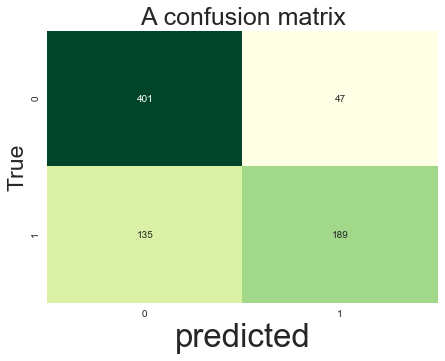

In [183]:
ConfusionMatrix(y_test,GBC_predict, label=["non positive", "positive"])

In [175]:
third_submission=samplesubmission.copy()
third_submission.SOURCE = GBCmodel.predict(testing)

In [184]:
third_submission.to_csv('my-third_sub', index=False)

In [185]:
third_submission

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0
...,...,...
1319,patient_id_2070,0
1320,patient_id_1789,0
1321,patient_id_1725,0
1322,patient_id_3707,0


# XGBoost Classifier Model

In [194]:
## Importing XGboost regression model from sklearn

from xgboost import XGBClassifier
XGBmodel=XGBClassifier()

##fitting model
XGBmodel.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [207]:
XGB_predict=XGBmodel.predict(x_test)
accuracy=metrics.accuracy_score(y_test, XGB_predict)

##Accuraccy Test

F1=metrics.f1_score(y_test, XGB_predict)
print("Random Forest model Accuracy value is ", accuracy)
print("Random Forest model F1 value is ", F1)

Random Forest model Accuracy value is  0.7435233160621761
Random Forest model F1 value is  0.6574394463667821


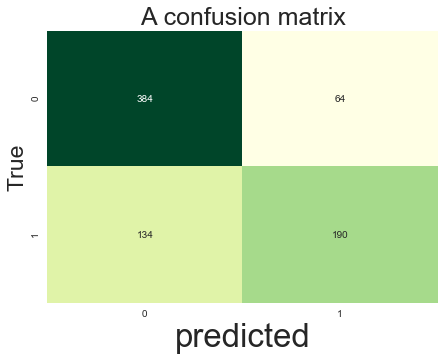

In [208]:
ConfusionMatrix(y_test,XGB_predict, label=["non positive", "positive"])

In [209]:
fourth_submission=samplesubmission.copy()
fourth_submission.SOURCE = XGBmodel.predict(testing)

In [200]:
fourth_submission.to_csv('my-fourth_sub', index=False)

In [201]:
fourth_submission

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0
...,...,...
1319,patient_id_2070,0
1320,patient_id_1789,0
1321,patient_id_1725,0
1322,patient_id_3707,1


# DECISION TREE MODEL

In [204]:
##importing decison tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
Decisionmodel=DecisionTreeClassifier()

#Training data for predicion 
Decisionmodel.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [206]:
##prediction
Decision_predict=Decisionmodel.predict(x_test)
accuracy=metrics.accuracy_score(y_test, Decision_predict)


##Accuraccy Test

F1=metrics.f1_score(y_test, Decision_predict)
print("Random Forest model Accuracy value is ", accuracy)
print("Random Forest model F1 value is ", F1)

Random Forest model Accuracy value is  0.6541450777202072
Random Forest model F1 value is  0.5847589424572318
